# <span style="color:red"> Image Captioning </span>
### A LSTM based recurrent neural network architecture to automatically generate captions from images..
### <span style="color:green"> Notebook 1 of 4: Dataset </span>

<img src="images/_project_intro.png" style="margin:auto" width="800"/>

# <span style="color:crimson"> Data Description </span>

- The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.
- The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.

<img src="images/coco-examples.jpg" style="margin:auto" width="800"/>

Note: About the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, we will explore this dataset, in preparation for the project.

# <span style="color:crimson"> Step 1: Initialize the COCO API </span>

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you we use to obtain the data.

In [1]:
# !pip install pycocotools
# pip install -U numpy

In [2]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

dataDir           = "opt/cocoapi"
dataType          = "val2014"

# Initializing COCO API for instance annotations >>
instances_annFile = os.path.join(dataDir, f"annotations/instances_{dataType}.json")
coco              = COCO(instances_annFile)

# Initializing COCO API for caption annotations >>
captions_annFile = os.path.join(dataDir, f"annotations/captions_{dataType}.json")
coco_caps        = COCO(captions_annFile)

# Getting image ids >>
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=2.99s)
creating index...
index created!
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [3]:
len(ids)

291875

# <span style="color:crimson"> Step 2: Plot a Sample Image </span>

- Next, we plot a random image from the dataset, along with its five corresponding captions.
- Each time you run the code cell below, a different image is selected.  
- We will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000463653.jpg


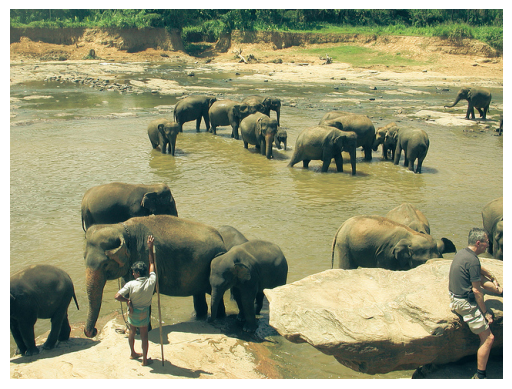

A herd of elephants walking around a river.
A collective of elephants convening at a watering hole.
A group of elephants walk through a shallow river. 
A number of elephants in a river with their caretaker
A group of elephants wade in a river as people sit or stand nearby. 


In [4]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# Picking a random image and obtain the corresponding URL >>
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img    = coco.loadImgs(img_id)[0]
url    = img['coco_url']

# Printing URL and visualize corresponding image >>
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# Loading and display captions >>
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns   = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

# <span style="color:crimson"> Next: Construct & train a CNN-RNN model  </span>

We will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.

<img src="images/encoder-decoder.png" style="margin:auto" width="800"/>)